In [35]:
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:

# Load the dataset
df = pd.read_csv(r'C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\SkinCare_Recommendation_Final\skincare_products_1500_unique.csv')

In [56]:
df.head()

,Product Name,Brand,Skin Concern,Severity,Ingredients,Product Type,Skin Type,Price,Customer Rating,Reviews,Availability,Feature_Blob
0,La Roche-Posay Toner,Innisfree,"Dark Spot, Nodules, Papules",Medium,Centella Asiatica Vitamin C Salicylic Acid,Serum,oily,1588.49,4.6,174,Nykaa,"Dark Spot, Nodules, Papules Medium Centella As..."
1,Paula's Choice Serum,Clinique,"Nodules, Papules",Medium,Azelaic Acid Vitamin C Niacinamide Zinc PCA...,Exfoliator,"normal, dry, combination",1634.94,3.5,1601,"Official Website, Ulta","Nodules, Papules Medium Azelaic Acid Vitamin ..."
2,Clinique Moisturizer,La Roche-Posay,"Blackheads, Whiteheads",Low,Azelaic Acid Centella Asiatica Niacinamide ...,Cleanser,normal,2010.47,3.9,2100,"Official Website, Ulta","Blackheads, Whiteheads Low Azelaic Acid Cente..."
3,Paula's Choice Moisturizer,Bioderma,"Papules, Pustules",Medium,Niacinamide Glycolic Acid,Serum,"combination, oily",921.33,4.3,3815,"Nykaa, Dermstore","Papules, Pustules Medium Niacinamide Glycolic..."
4,Clinique Cleanser,Bioderma,"Dark Spot, Papules",Medium,Centella Asiatica Hyaluronic Acid,Exfoliator,"normal, dry",1420.46,4.7,3204,"Dermstore, Nykaa","Dark Spot, Papules Medium Centella Asiatica H..."


In [39]:
df.head(3)

,Product Name,Brand,Skin Concern,Severity,Ingredients,Product Type,Skin Type,Price,Customer Rating,Reviews,Availability,Feature_Blob
0,La Roche-Posay Toner,Innisfree,"Dark Spot, Nodules, Papules",Medium,Centella Asiatica Vitamin C Salicylic Acid,Serum,oily,1588.49,4.6,174,Nykaa,"Dark Spots, Nodules, Papules Medium Centella A..."
1,Paula's Choice Serum,Clinique,"Nodules, Papules",Medium,Azelaic Acid Vitamin C Niacinamide Zinc PCA...,Exfoliator,"normal, dry, combination",1634.94,3.5,1601,"Official Website, Ulta","Nodules, Papules Medium Azelaic Acid Vitamin ..."
2,Clinique Moisturizer,La Roche-Posay,"Blackheads, Whiteheads",Low,Azelaic Acid Centella Asiatica Niacinamide ...,Cleanser,normal,2010.47,3.9,2100,"Official Website, Ulta","Blackheads, Whiteheads Low Azelaic Acid Cente..."


In [40]:
df.shape

(1500, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Name     1500 non-null   object 
 1   Brand            1500 non-null   object 
 2   Skin Concern     1500 non-null   object 
 3   Severity         1500 non-null   object 
 4   Ingredients      1500 non-null   object 
 5   Product Type     1500 non-null   object 
 6   Skin Type        1500 non-null   object 
 7   Price            1500 non-null   float64
 8   Customer Rating  1500 non-null   float64
 9   Reviews          1500 non-null   int64  
 10  Availability     1500 non-null   object 
 11  Feature_Blob     1500 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 140.8+ KB


In [42]:
df.isna().value_counts()

Product Name  Brand  Skin Concern  Severity  Ingredients  Product Type  Skin Type  Price  Customer Rating  Reviews  Availability  Feature_Blob
False         False  False         False     False        False         False      False  False            False    False         False           1500
Name: count, dtype: int64

C:\Users\Samiksha Bhatia\AppData\Local\Temp\ipykernel_16776\1923981942.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_availability.index, y=brand_availability.values, palette='Pastel1')


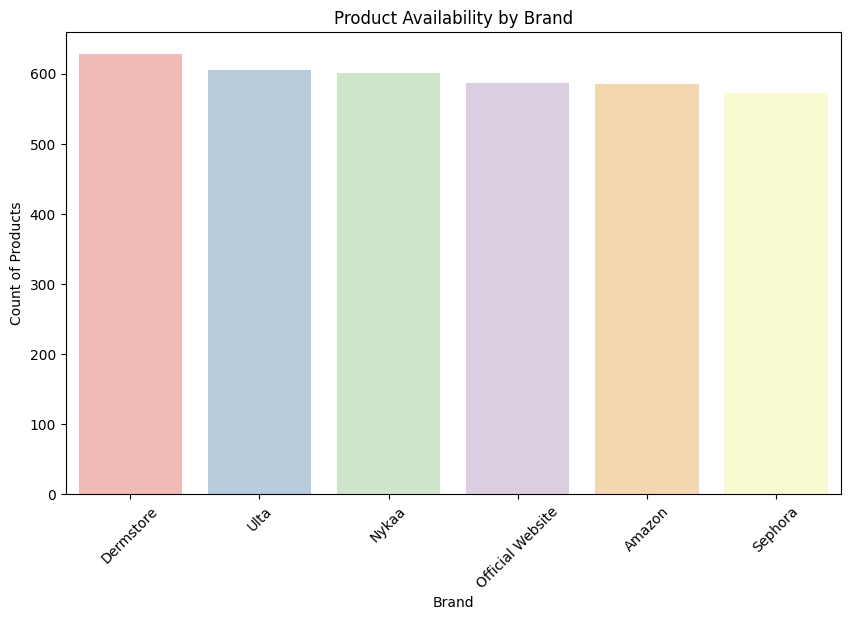

In [43]:
df['Skin Concern'] = df['Skin Concern'].str.split(', ').apply(lambda x: ', '.join(sorted(x)))


# Availability by Brand (Bar chart)
plt.figure(figsize=(10, 6))
brand_availability = df['Availability'].str.split(', ').explode().value_counts()
sns.barplot(x=brand_availability.index, y=brand_availability.values, palette='Pastel1')
plt.title('Product Availability by Brand')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
plt.show()


C:\Users\Samiksha Bhatia\AppData\Local\Temp\ipykernel_16776\2329481264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Type', y='Price', data=df, palette='Set3')


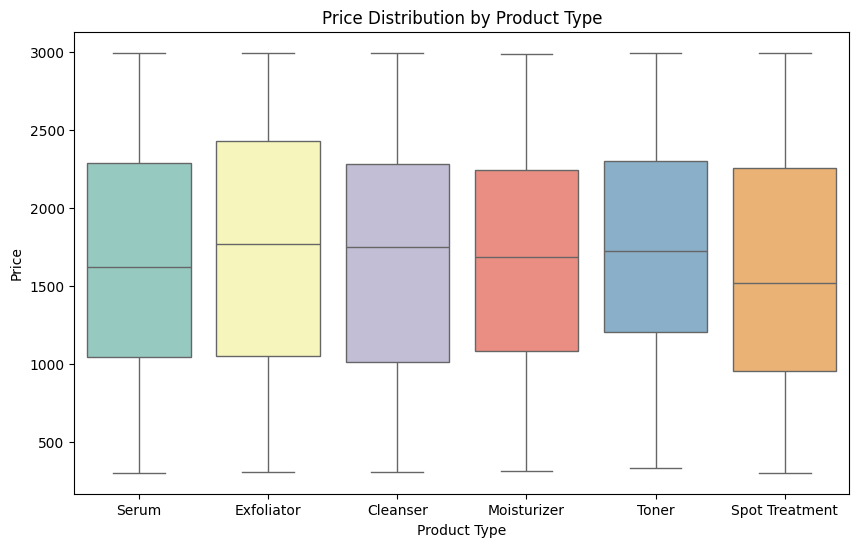

In [44]:
#Price Distribution for Each Product Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Type', y='Price', data=df, palette='Set3')
plt.title('Price Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Price')
plt.show()



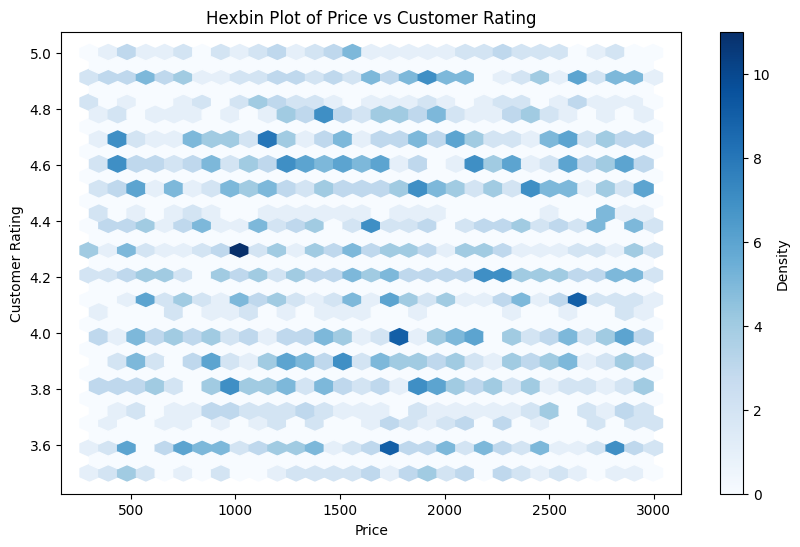

In [45]:
# Price vs Customer Rating
plt.figure(figsize=(10, 6))
plt.hexbin(df['Price'], df['Customer Rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot of Price vs Customer Rating')
plt.xlabel('Price')
plt.ylabel('Customer Rating')
plt.show()

In [46]:
# Preprocessing function
def preprocess_data(df):
    # Combine key features into a text blob for easier matching
    df['Ingredients'] = df['Ingredients'].str.replace(',', ' ')
    df['Feature_Blob'] = df['Skin Concern'] + ' ' + df['Severity'] + ' ' + df['Ingredients'] + ' ' + df['Product Type']

    # Convert skin type to lowercase
    df['Skin Type'] = df['Skin Type'].str.lower()

    return df

In [47]:
def get_recommendations(skin_concern, severity, price_range=(0, 100), top_n=5):
        """Get product recommendations based on user preferences."""
        # Convert skin_concern and severity to lowercase
        skin_concern = [concern.lower() for concern in skin_concern]
        severity = severity.lower()

        # Filter by price range
        filtered_df = df[(df['Price'] >= price_range[0]) & (df['Price'] <= price_range[1])]
        if filtered_df.empty:
            return pd.DataFrame()

        # Ensure exact skin concern match (case-insensitive)
        concern_df = filtered_df[filtered_df['Skin Concern'].apply(
            lambda x: any(concern in x.lower().split(',') for concern in skin_concern)
        )]
        if concern_df.empty:
            return pd.DataFrame()

        # Filter by severity (case-insensitive)
        severity_df = concern_df[concern_df['Severity'].str.contains(severity, case=False, na=False)]
        if severity_df.empty:
            return pd.DataFrame()

        # Create user query (in lowercase)
        user_query = ' '.join(skin_concern + [severity])
        product_features = severity_df['Feature_Blob']

        # TF-IDF Vectorization
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform([user_query] + product_features.tolist())

        # Compute cosine similarity
        cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

        # Create a copy of severity_df to avoid modifying the original DataFrame directly
        severity_df_copy = severity_df.copy()
        severity_df_copy['Score'] = cosine_similarities

        # Sort by similarity score and customer rating
        sorted_df = severity_df_copy.sort_values(by=['Score', 'Customer Rating'], ascending=[False, False])
        
        # Reset the index and assign custom index starting from 1
        sorted_df = sorted_df.reset_index(drop=True)
        sorted_df.index = sorted_df.index + 1  # Set custom index starting from 1
        
        # Return top_n products with relevant details
        return sorted_df.head(top_n)[['Product Name', 'Brand', 'Ingredients', 'Price', 'Customer Rating', 'Availability', 'Score']]

In [58]:
# Example usage
if __name__ == "__main__":
    # User input simulation
    user_skin_type = "Dry"
    user_concern =  ['papules'] 
    user_severity = "High"  # Example severity input
    max_price = 1000

    recommendations = get_recommendations(
        skin_concern=user_concern,
        severity=user_severity,
        price_range=(0, max_price),
        top_n=5
    )

    if not recommendations.empty:
        print(f"\nRecommended products for {user_skin_type} skin with {', '.join(user_concern)} concerns and {user_severity} severity:")
        print(recommendations.to_string(index=False))
    else:
        print("No products found matching your criteria. Please try different parameters.")


Recommended products for Dry skin with papules concerns and High severity:
        Product Name        Brand                            Ingredients  Price  Customer Rating                      Availability    Score
Technology Treatment    Innisfree        Vitamin C  Niacinamide  Retinol 476.07              4.5         Nykaa, Dermstore, Sephora 0.323908
      Face Treatment   Neutrogena            Retinol  Vitamin C  Retinol 495.94              4.1    Official Website, Amazon, Ulta 0.294536
     Character Toner   Neutrogena        Vitamin C  Niacinamide  Retinol 394.89              3.8 Official Website, Dermstore, Ulta 0.290626
    Night Exfoliator     Clinique Vitamin C  Salicylic Acid  Niacinamide 652.80              4.2                     Nykaa, Amazon 0.279213
     Choice Cleanser The Ordinary   Azelaic Acid  Glycolic Acid  Retinol 695.25              4.0                  Nykaa, Dermstore 0.251938


In [57]:
df['Severity'].unique()

array(['Medium', 'Low', 'High'], dtype=object)